In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
sims = 10000000


values = list(range(900, 1001))
df = pd.DataFrame({'price': values})
df['p(reserve)'] = df['price']*0.01 - 9
df['p(reserve)'] = df['p(reserve)'] / df['p(reserve)'].sum()
reserve = np.random.choice(df['price'], size=sims, p=df['p(reserve)'])

In [8]:
print("mean", reserve.mean())
print("std", reserve.std())
print("median", np.median(reserve))

mean 967.0077929
std 23.674829168775663
median 971.0


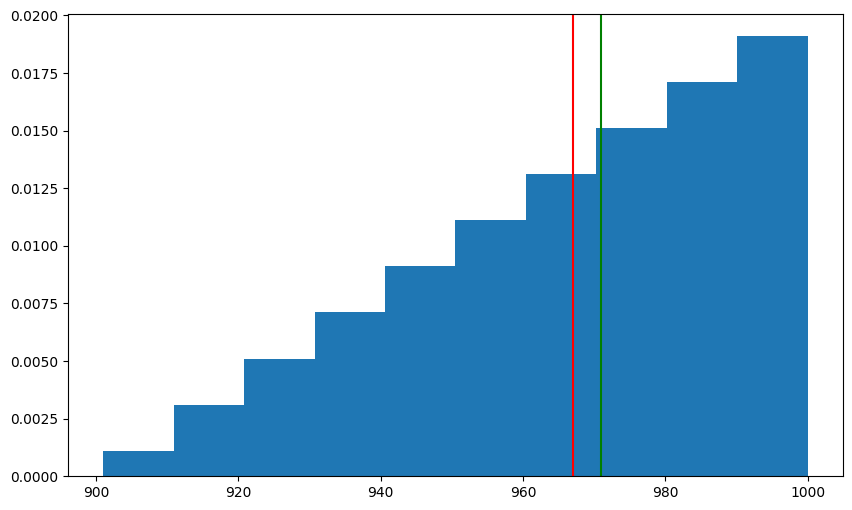

In [3]:
plt.figure(figsize = (10,6))
plt.hist(reserve,density = True)
# plt.plot(reserve)
plt.axvline(reserve.mean(),color='r')
plt.axvline(np.median(reserve),color='g')
plt.show()

In [10]:
import numpy as np
import pandas as pd
from scipy import integrate

# Define the range of possible reserve prices
values = np.arange(900, 1001)

# Define the PDF for the reserve prices
def pdf_reserve_price(x):
    return (x - 900) / 100.0

# Calculate the cumulative distribution function (CDF)
def cdf_reserve_price(x):
    return integrate.quad(pdf_reserve_price, 900, x)[0]

# Calculate the probability of winning the bid for a given bid price and reserve price
def probability_win_bid(bid, reserve_price):
    if bid > reserve_price:
        return 1 - cdf_reserve_price(bid)
    else:
        return 0

# Define the selling price
selling_price = 1000  # Seashells

# Perform Monte Carlo simulation
sims = 100
bids = np.random.randint(900, 1001, sims)

expected_payoffs = []

# Iterate over different bid prices
for bid in bids:
    # Calculate the probability of winning the bid for each reserve price
    probabilities = [probability_win_bid(bid, reserve) for reserve in values]
    
    # Calculate the expected payoff for the bid
    expected_payoff = np.sum(probabilities * (selling_price - bid))
    expected_payoffs.append(expected_payoff)

# Calculate the optimal bid that maximizes the expected payoff
optimal_bid_index = np.argmax(expected_payoffs)
optimal_bid = bids[optimal_bid_index]
max_expected_payoff = expected_payoffs[optimal_bid_index]

print("Optimal Bid:", optimal_bid)
print("Max Expected Payoff:", max_expected_payoff)


Optimal Bid: 908
Max Expected Payoff: 500.48
